### Exercise 1
Python syntax and plot types. In a jupyter notebook generate 4 subplots on a 2x2 grid
with the following properties:
- A histogram of 1000 Gaussian random numbers, with x-axis limits between -5 and +5.
- A scatterplot of noisy data that should be aranged around a line of slope 1.
- A barplot of categories "A" to "Z" at every other letter, and the height of each bar should correspond to the position of each letter in the alphabet.
- A normal plot of cos(x), sin(x) and cos(x) − sin(x) in [−π; +π].

In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np

<module 'matplotlib.pyplot' from 'c:\\Users\\Xeonis7\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

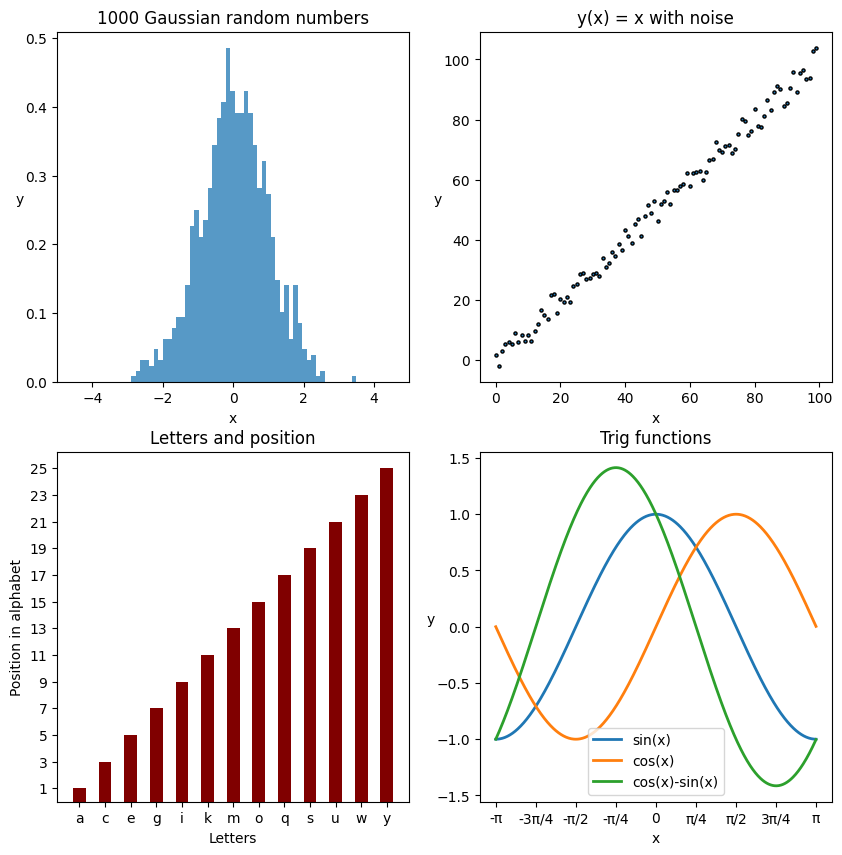

In [2]:
fig, ax = plt.subplots(2,2,figsize = (10,10))

#Subplt1
x_1 = np.random.normal(0, 1, 1000)
n, bins, patches = ax[0, 0].hist(x_1, 50, density = True, facecolor = "C0", alpha = 0.75)
ax[0, 0].set_title("1000 Gaussian random numbers")
ax[0, 0].set_xlim([-5, 5])
ax[0, 0].set_xlabel("x")
ax[0, 0].set_ylabel("y", rotation = 0)


#Subplt2
x_2 = np.arange(0, 100, 1)
y_2 = np.zeros(100)
for i in range(100):
    y_2[i] = i + np.random.uniform(-5,5)
ax[0, 1].scatter(x_2, y_2, s=5, facecolor='C0', edgecolor='k')
ax[0, 1].set_title("y(x) = x with noise")
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("y", rotation=0)


#Subplt3
alph = list(string.ascii_lowercase)
x_3 = np.empty(13, dtype = str)
for i in range(13):
    x_3[i] = alph[2*i]
y_3 = np.arange(1,26,2)
ax[1, 0].bar(x_3, y_3, color = "maroon", width = 0.5)
ax[1, 0].set_title("Letters and position")
ax[1, 0].set_xlabel("Letters")
ax[1, 0].set_ylabel("Position in alphabet")
ax[1, 0].set_yticks(y_3)


#Subplt4
pi = "\u03C0"
x_4 = np.arange(-np.pi, np.pi , 0.01)
y_4_1 = np.cos(x_4)
line1, = ax[1, 1].plot(x_4, y_4_1, lw = 2)
y_4_2 = np.sin(x_4)
line2, = ax[1, 1].plot(x_4, y_4_2, lw=2)
y_4_3 = np.cos(x_4) - np.sin(x_4)
line3, = ax[1, 1].plot(x_4, y_4_3, lw=2)

#x-Axis ticks
l = np.arange(-np.pi, np.pi+0.01, (2*np.pi)/8)
x_4_name = np.empty(9, dtype=str)
x_4_name = np.array(["-" + pi, ("-3" + pi + "/4"), ("-" + pi + "/2"), ("-" +
                    pi + "/4"), "0", (pi + "/4"), (pi + "/2"), ("3" + pi + "/4"), pi])
ax[1, 1].set_xticks(l)
ax[1, 1].set_xticklabels(x_4_name)

#Labels
ax[1, 1].set_title("Trig functions")
ax[1, 1].set_xlabel("x")
ax[1, 1].set_ylabel("y", rotation=0)
ax[1, 1].legend([line1, line2, line3], ["sin(x)", "cos(x)", "cos(x)-sin(x)"], loc = 0 )


### Exercise 2
Plotting "real" data. Download the file ex3_grades.dat from Moodle. You should perform
the following tasks:
- Read in the data file using numpy.
- Create a histogram of grades with the following key: < 60% = 5, 60.00% − 69.99% = 4, 70.00% − 79.99% = 3, 80.00% − 89.99% = 2, 90.00% − 100.00% = 1.
- Find and print the 5 best students, their scores, and their grades.
- Compute and print the lowest, highest and average scores and add this information to the histogram figure.

['Student_295' 92.0 1]
['Student_263' 93.0 1]
['Student_147' 94.0 1]
['Student_224' 96.0 1]
['Student_472' 96.0 1]


Text(0.4, 180, 'min: 0.0\nmax: 96.0\navg: 47.3')

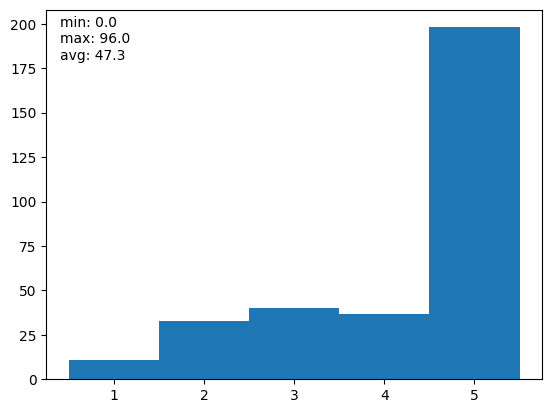

In [3]:
#Read file
with open("ex2_grades.dat") as f:
    data_2 = f.readlines()
st = []
for i in data_2:
    st.append(i.split(";"))

#Convert to np.array
st_arr = np.empty((len(st), 2), dtype = object)
for i,j in enumerate(st):
    st_arr[i,0] = j[0]
    st_arr[i,1] = j[1]
st_arr[:, 1] = st_arr[:, 1].astype(float)

#Add column with grades
st_arr = np.append(st_arr, np.zeros((len(st), 1), dtype=int), axis=1)
for i in range(5):
    for j,v in enumerate(st_arr[:,1]):
        if float(v) < 60 + i*10 and not st_arr[j,2]:
            st_arr[j,2] = 5 - i

#Histogram
fig, ax_g = plt.subplots()
ax_g.hist(st_arr[:,2], bins = (1/2, 3/2, 5/2, 7/2, 9/2, 11/2))

#Top 5
ind = np.argpartition(st_arr[:,1], -5)[-5:]
for i in ind:
    print(st_arr[i])

#Additional Info
min = np.sort(st_arr[:,1])[1]
max = np.sort(st_arr[:,1])[-1]
avg = np.average(st_arr[:, 1])
txt = "min: " + str(min) + "\n" + "max: " + str(max) + "\n" + "avg: " + str(round(avg,1))
ax_g.text(0.4,180,txt)



# Exercise 3
Plotting "real" data. Download the fileex3_co2.datfrom Moodle. You should performthe following tasks:
- Read in the data file.
- Compute the total CO2emission of each country/region from 1950 onwards and create abarplot.
- Show the development from 1950 onwards for the top countries/regions

C:\Users\Xeonis7\AppData\Local\Temp\ipykernel_8160\3287541465.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_C.set_xticklabels(names, rotation = 90)


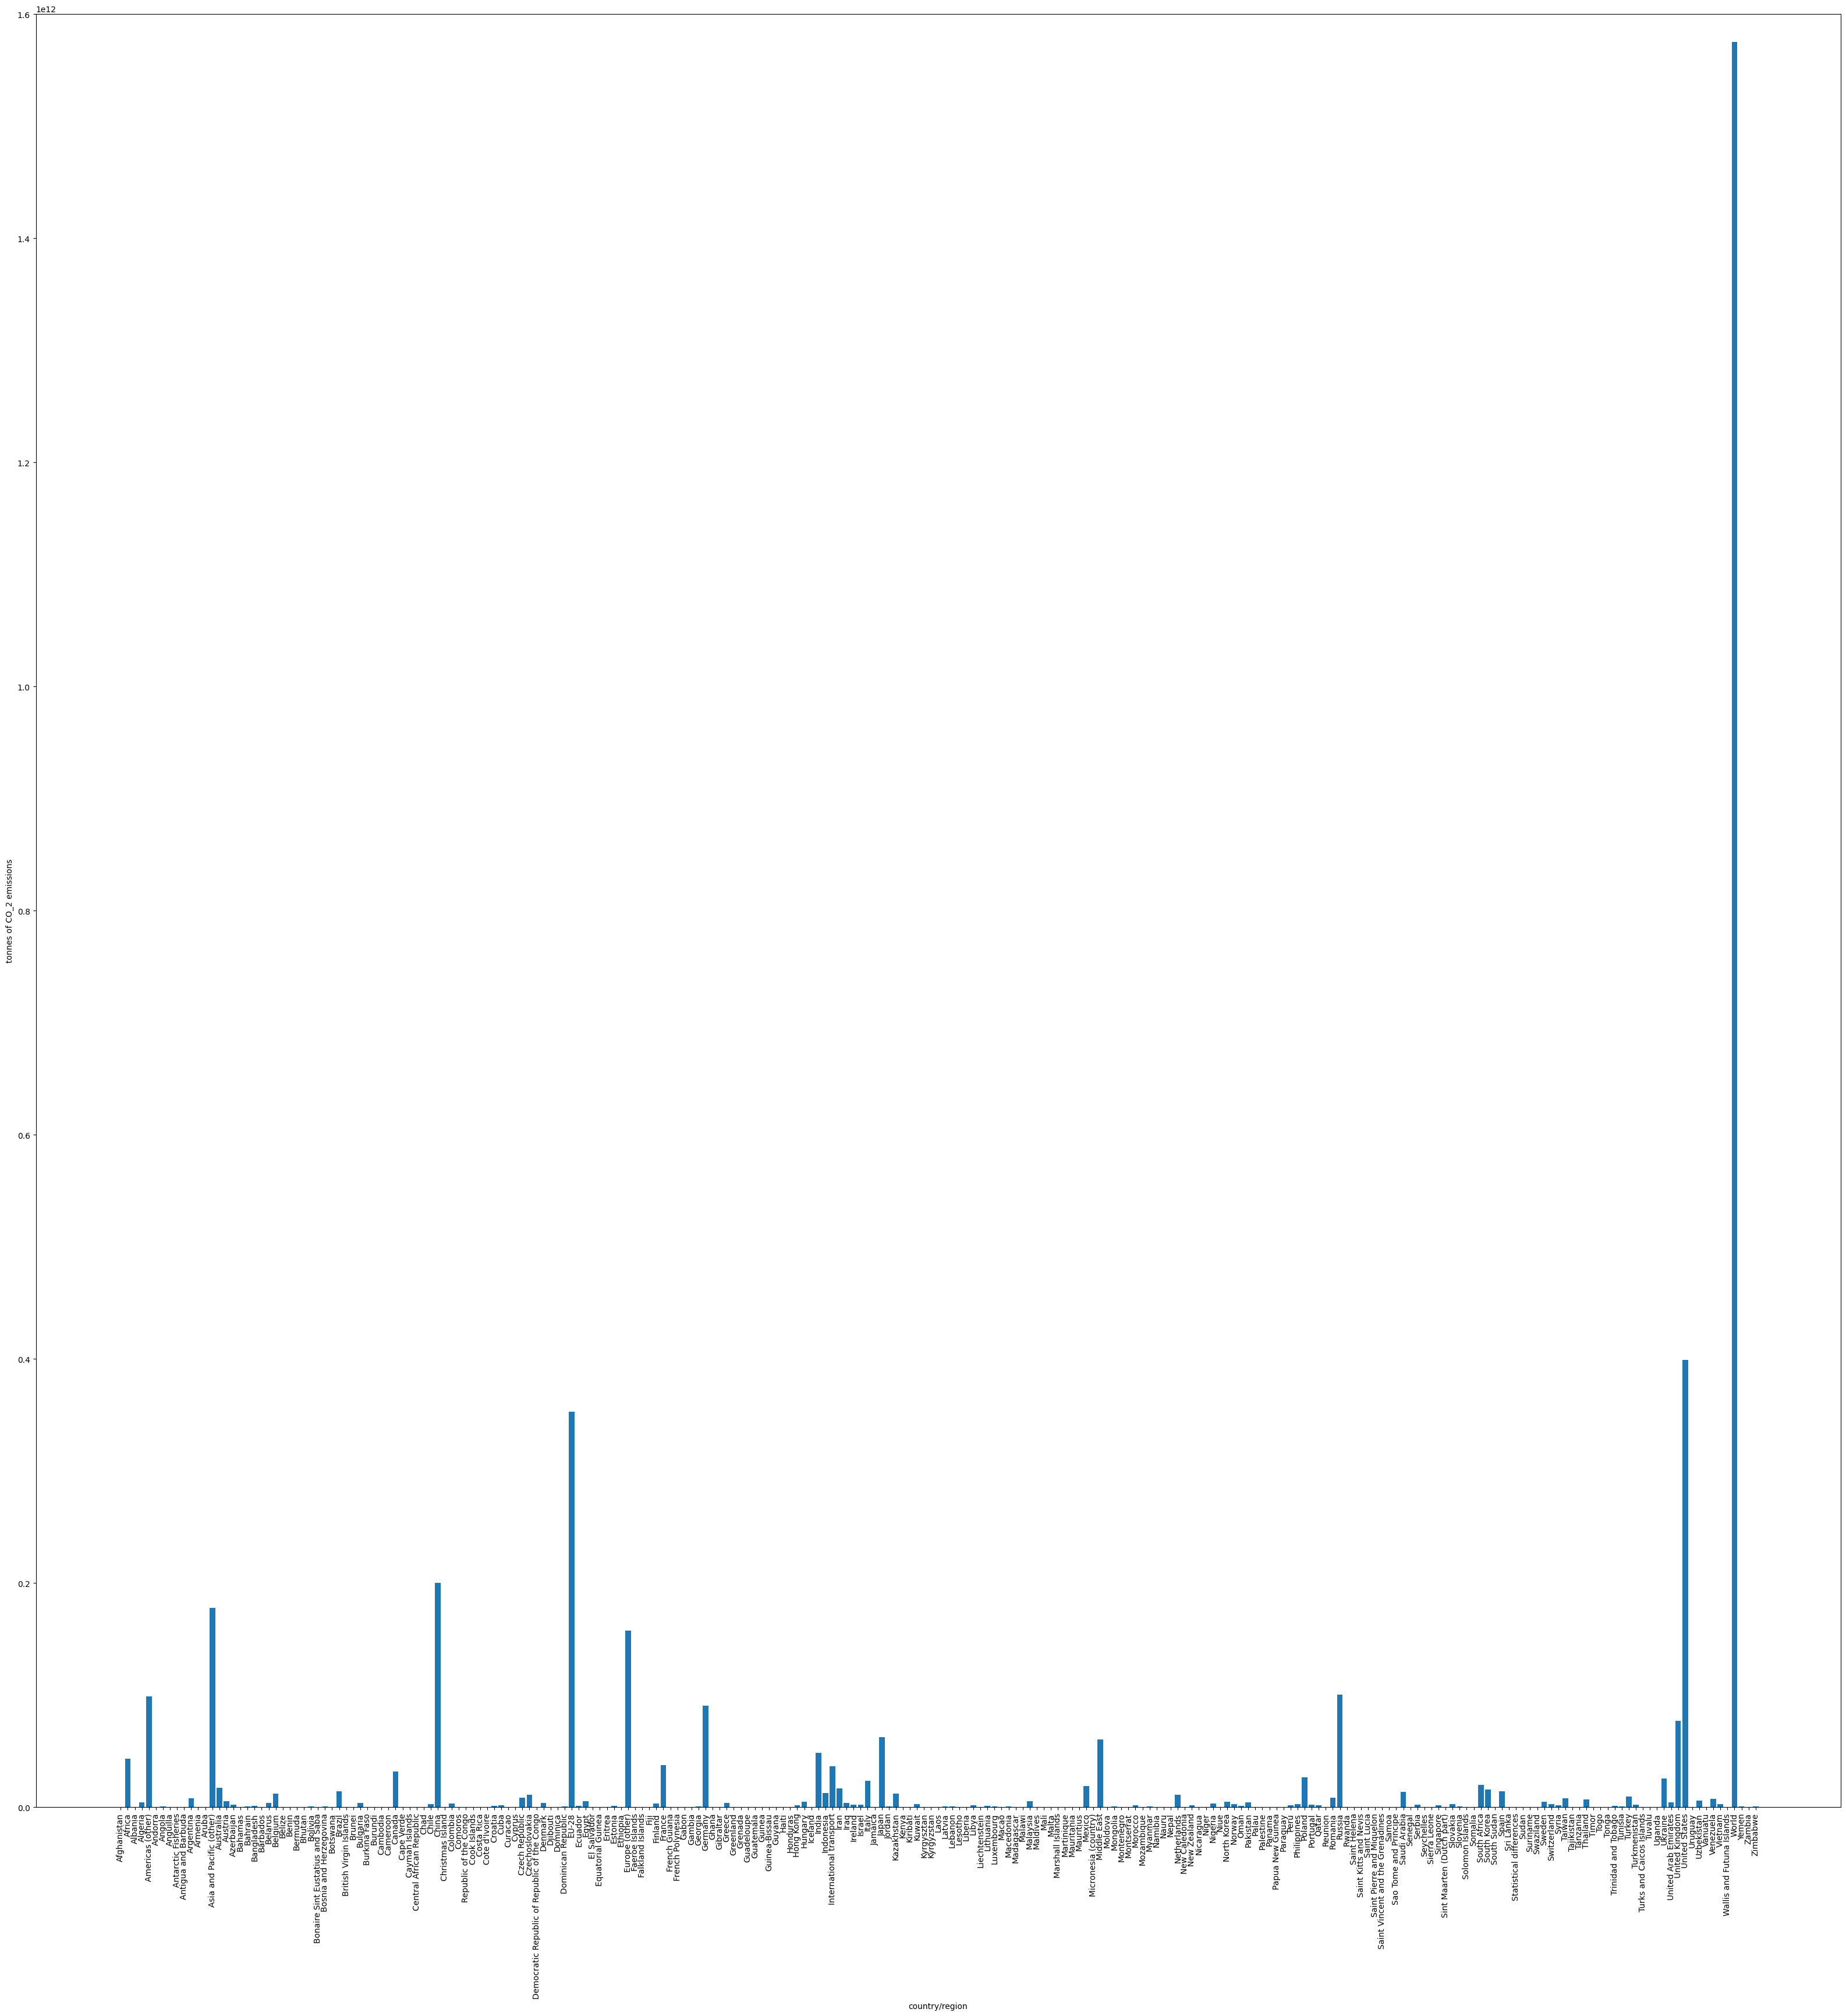

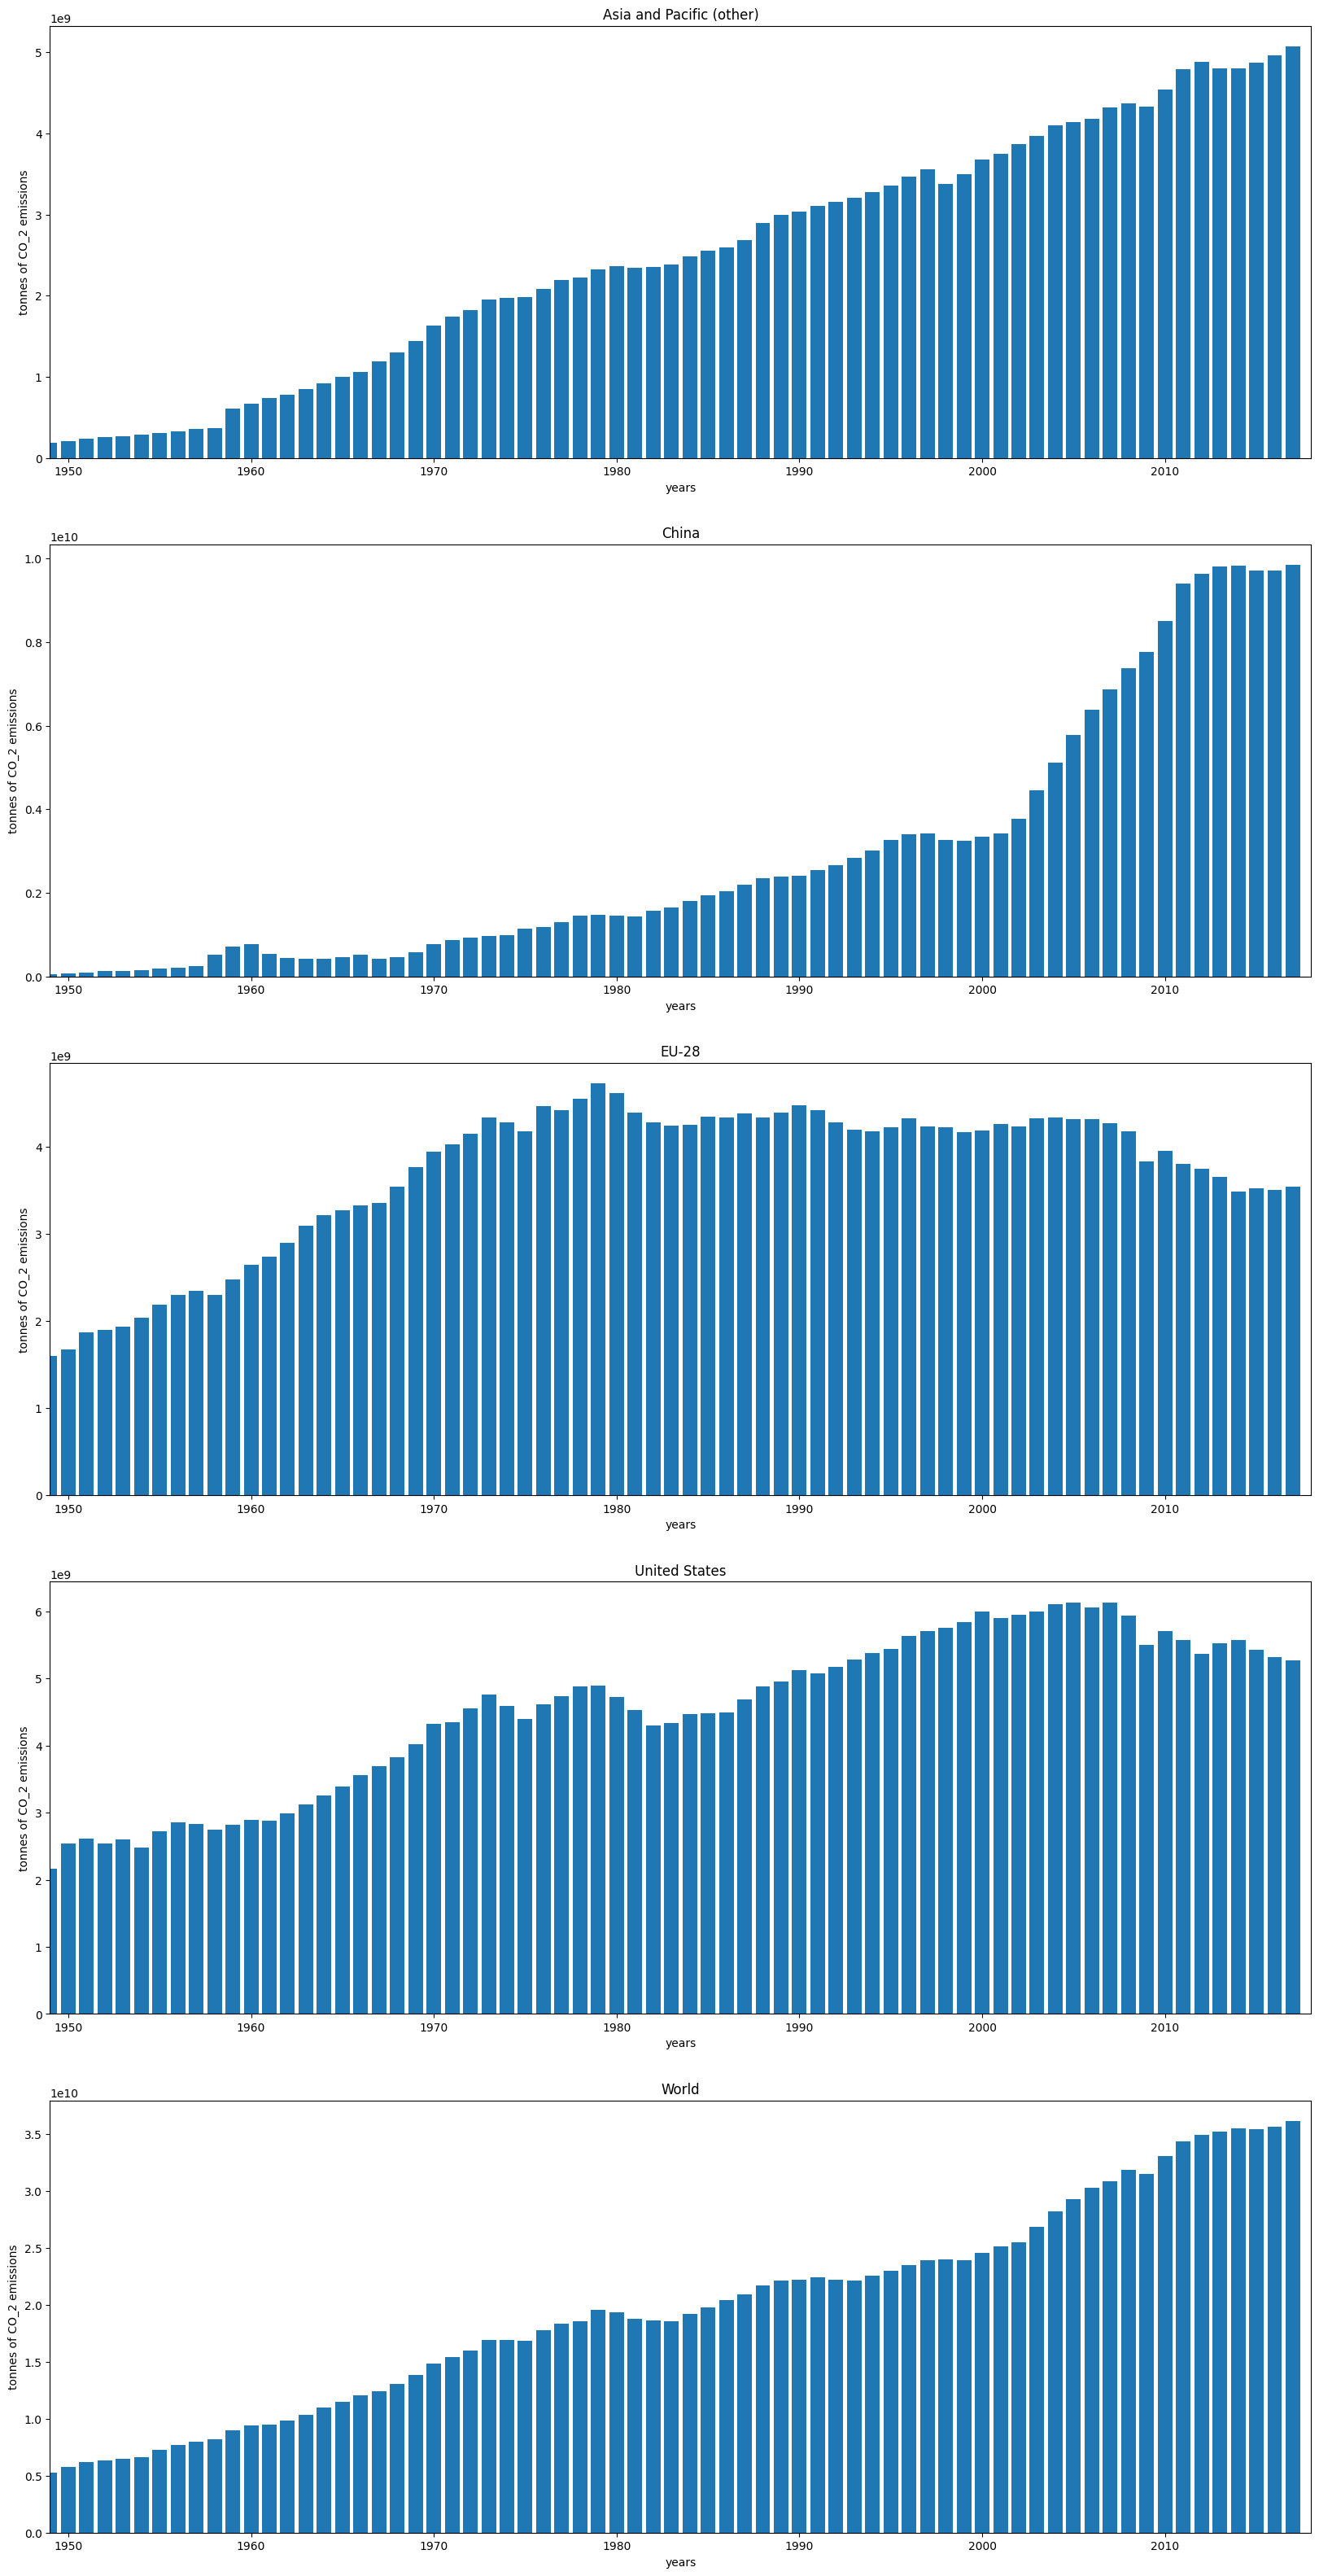

In [4]:
with open("ex3_co2.dat") as f:
    data_3 = f.readlines()
data_3.pop(0)

C = []
for i in data_3:
    C.append(i.split(","))


# Convert to np.array
C_arr = np.empty_like(C, dtype=object)
for k in range(len(C[0])):
    for i, j in enumerate(C):
        C_arr[i, k] = j[k]

C_arr[:, 2] = C_arr[:, 2].astype(int)
C_arr[:, 3] = C_arr[:, 3].astype(float)

#Find starting idx and names of all countries
idx = []
names = []
for i in range(len(C_arr)):
    if C_arr[i,1] != C_arr[i - 1,1]:
        idx.append(i)
        names.append(C_arr[i,0])

#Sum ttl emissions per country and l list of thei indizes
ttl = np.empty_like(idx, dtype = float)
l = []
for i, j in enumerate(idx):
    if i != len(idx) - 1:
        l.append(list(np.arange(j, idx[i + 1], 1)))
    else:
        l.append(list(np.arange(j, len(C_arr[:, 3]))))
    for k in l[i]:
        ttl[i] += C_arr[k, 3]

#Draw frankly useless bar diagramm
fig, ax_C = plt.subplots(figsize = (40, 40))
ax_C.bar(names, ttl)
ax_C.set_xticklabels(names, rotation = 90)
ax_C.set_ylim(0, 1.6e12)
ax_C.set_xlabel("country/region")
ax_C.set_ylabel("tonnes of CO_2 emissions")

#Bar plot top 5
top_idx = np.argpartition(ttl, -5)[-5:]
fig, ax_top = plt.subplots(5, 1, figsize = (20, 40))
for i, j in enumerate(top_idx):
    r = l[j]
    ax_top[i].bar(C_arr[r,2], C_arr[r,3])
    ax_top[i].set_xbound(1949, 2018)
    ax_top[i].set_xlabel("years")
    ax_top[i].set_ylabel("tonnes of CO_2 emissions")
    ax_top[i].set_title(C_arr[r[0],0])

